In [1]:
library(dplyr)
library(stringr)
library(lubridate)
library(ggplot2)
library("reshape2")
library(zoo)
options(scipen=5)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
df <- read.csv("../Data/data_demos.csv")

In [3]:
df <- df %>% arrange(conversation_id, desc(issues))
df <- df[!duplicated(df[,c("conversation_id")]),]

In [4]:
head(df)

,X,starttime_daylight,conversation_id,issues,referred_by,media_referral,age,location
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,298323,2018-10-25 15:46:42+00:00,11247,Self Harm,,,,
7,9375,2018-10-25 15:54:58+00:00,11248,Anxiety/Stress|Depressed|Isolated,,,,
11,25172,2018-10-25 15:58:10+00:00,11249,"Abuse, sexual",,,,
15,104369,2018-10-25 16:12:30+00:00,11250,Anxiety/Stress|Relationship,,,,
19,65827,2018-10-25 16:39:02+00:00,11251,"Abuse, emotional|Anxiety/Stress|Isolated|Suicide",,,,
25,207283,2018-10-25 16:43:17+00:00,11252,Suicide,,,,


In [6]:
length(df$X)

[1] 1352526

In [5]:
df_chunks <- df %>% mutate(starttime = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
df_chunks

,starttime_daylight
,<chr>
1,2018-10-25 15:46:42+00:00
7,2018-10-25 15:54:58+00:00
11,2018-10-25 15:58:10+00:00
15,2018-10-25 16:12:30+00:00
19,2018-10-25 16:39:02+00:00
25,2018-10-25 16:43:17+00:00
31,2018-10-25 17:21:59+00:00
35,2018-10-25 17:27:38+00:00
39,2018-10-25 17:29:50+00:00


In [8]:
age_demo <- table(df$age)[-1]
age_demo <- age_demo[-9]
names(age_demo) <- c("<= 13", c(names(age_demo)[-1]))
age_demo

 <= 13  14-17  18-24  25-34  35-44  45-54  55-64    65+ 
 49787 143803 124724  69926  34729  19075   5827   1337 

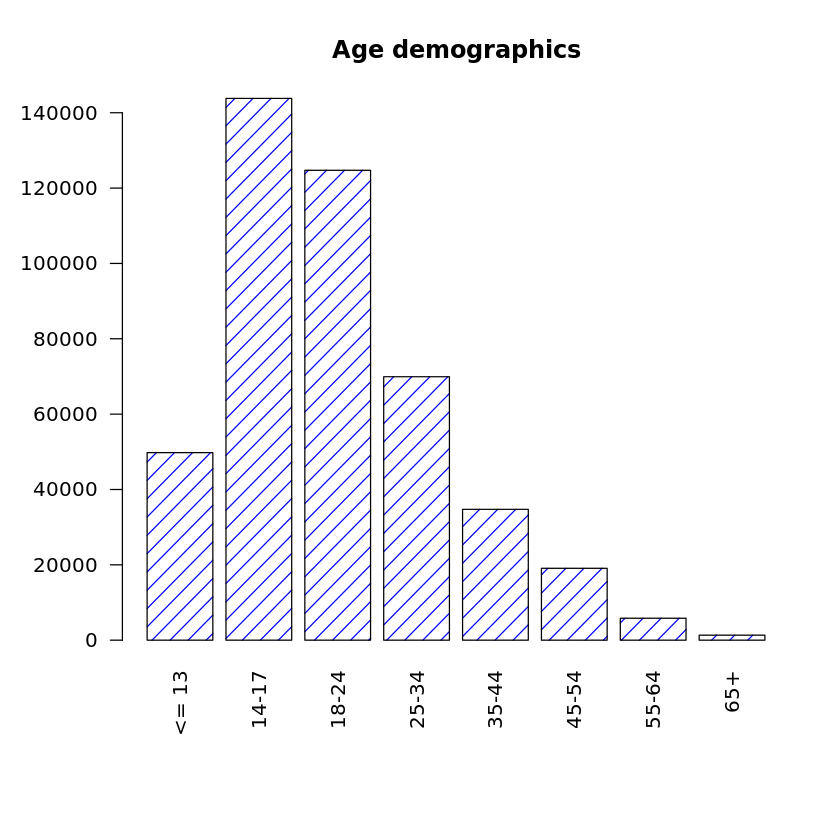

In [11]:
#pdf("../Plots/Demographics/Age.pdf")
op <- par(mar = c(8,5,4,2)+0.1)
barplot(age_demo,beside=T,las=2, main="Age demographics", col="blue", density=10)
par(op)
#dev.off()

In [12]:
location_demo <- table(df$location)[-1]
location_demo <- location_demo[order(location_demo)]
location_demo


        Northern Ireland                    Wales               North East 
                    3176                     6872                     7580 
           East Midlands                 Scotland          East of England 
                   13395                    13477                    13965 
Yorkshire and the Humber            West Midlands               South West 
                   14398                    14576                    15289 
          Greater London               North West               South East 
                   16930                    18691                    20891 

In [13]:
location_demo_weights <- location_demo/sum(location_demo)
location_demo_weights
#saveRDS(location_demo_weights, '../Data/location_demo_weights.rds')


        Northern Ireland                    Wales               North East 
              0.01994474               0.04315499               0.04760111 
           East Midlands                 Scotland          East of England 
              0.08411831               0.08463326               0.08769781 
Yorkshire and the Humber            West Midlands               South West 
              0.09041698               0.09153479               0.09601231 
          Greater London               North West               South East 
              0.10631751               0.11737629               0.13119191 

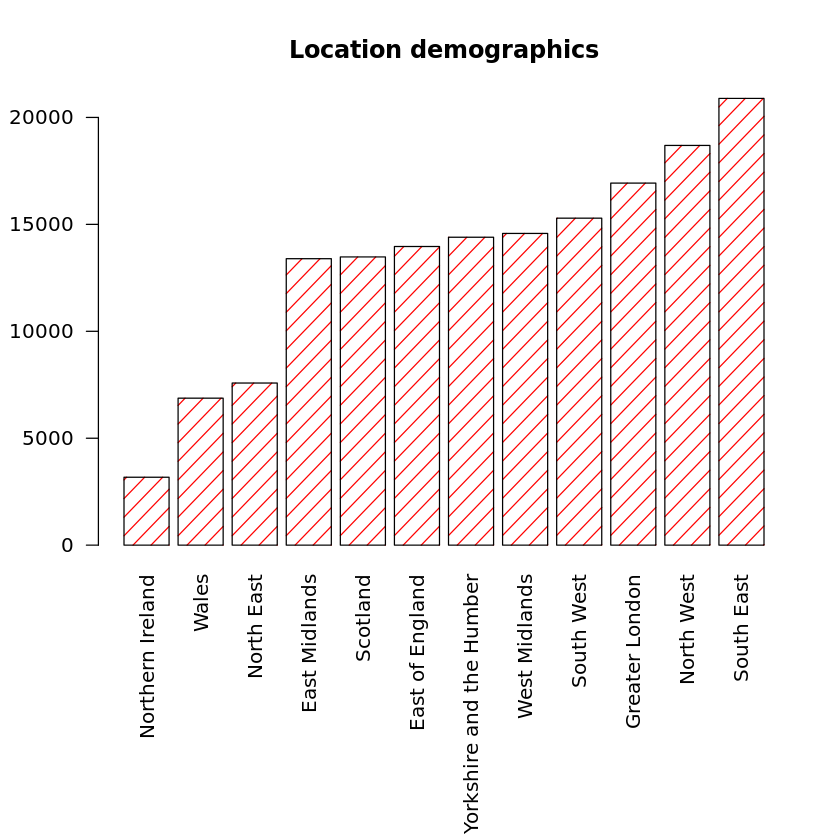

In [16]:
#pdf("../Plots/Demographics/Location.pdf")
op <- par(mar = c(12,4,4,2)+0.1)
barplot(location_demo,las=2, main="Location demographics", col="red", density=10)
par(op)
#dev.off() 

In [17]:
age_location_demo <- as.data.frame(table(df$location, df$age))
age_location_demo <- age_location_demo[!(age_location_demo$Var1=="" | age_location_demo$Var2=="" | age_location_demo$Var2=="No Answer"),]
age_location_demo

,Var1,Var2,Freq
,<fct>,<fct>,<int>
15,East Midlands,13 or younger,1426
16,East of England,13 or younger,1518
17,Greater London,13 or younger,1823
18,North East,13 or younger,850
19,North West,13 or younger,2094
20,Northern Ireland,13 or younger,367
21,Scotland,13 or younger,2042
22,South East,13 or younger,1659
23,South West,13 or younger,1232


Saving 6.67 x 6.67 in image



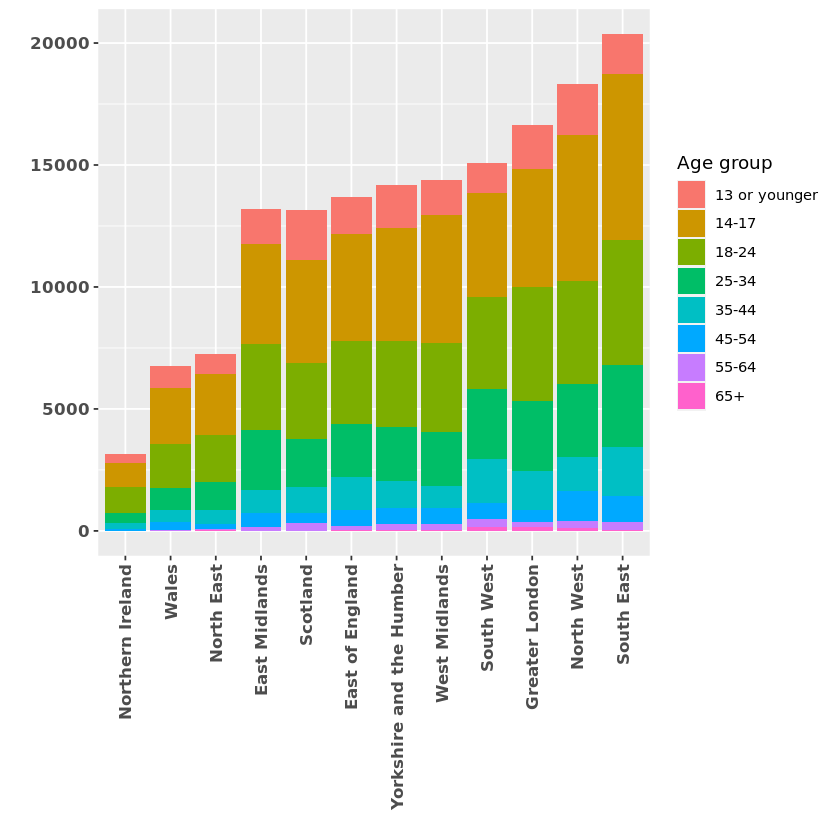

In [18]:
ggplot(age_location_demo, aes(x=factor(Var1, levels=c("Northern Ireland","Wales","North East","East Midlands","Scotland","East of England","Yorkshire and the Humber","West Midlands","South West","Greater London","North West","South East")), y=Freq,fill = Var2)) +
        geom_bar(stat = "identity") +
         labs(x="",y="", fill = "Age group") + 
            theme(axis.text.x = element_text(face="bold", size = 10,angle=90,vjust=0.5,hjust=1),
                                        axis.text.y = element_text(face="bold", size = 10))
#ggsave("../Plots/Demographics/Age_Location_demo.pdf")

In [21]:
top_regions <- c("South East", "North West", "Greater London", "South West", "West Midlands")
df_top_5 <- df %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
df_top_5 <- df_top_5[order(df_top_5$starttime_daylight),]
df_top_5 <- cut(df_top_5, 'day')
df_top_5 <- table(df_top_5)
df_top_5 <- as.data.frame(df_top_5)
df_top_5 <- as.data.frame(df_top_5[,1])
colnames(df_top_5) <- "day"
head(df_top_5)

,day
,<fct>
1,2018-10-25
2,2018-10-26
3,2018-10-27
4,2018-10-28
5,2018-10-29
6,2018-10-30


In [22]:
for (region in top_regions){
    df_temp <- df[df["location"]==region,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'day')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    colnames(df_plot_temp) <- c("day", paste(region))
    df_top_5 <- merge(x=df_top_5, y=df_plot_temp, by="day")
}
head(df_top_5)

,day,South East,North West,Greater London,South West,West Midlands
,<fct>,<int>,<int>,<int>,<int>,<int>
1,2018-11-15,1,1,4,0,0
2,2018-11-16,0,1,4,0,0
3,2018-11-17,1,0,1,0,1
4,2018-11-18,0,0,0,0,0
5,2018-11-19,0,1,0,0,1
6,2018-11-20,1,0,0,0,0


In [23]:
df_top_5$day <- as.Date(df_top_5$day)
df_top_5_plot <- df_top_5 %>% filter(day >= "2021-01-01" & day < "2022-01-01")

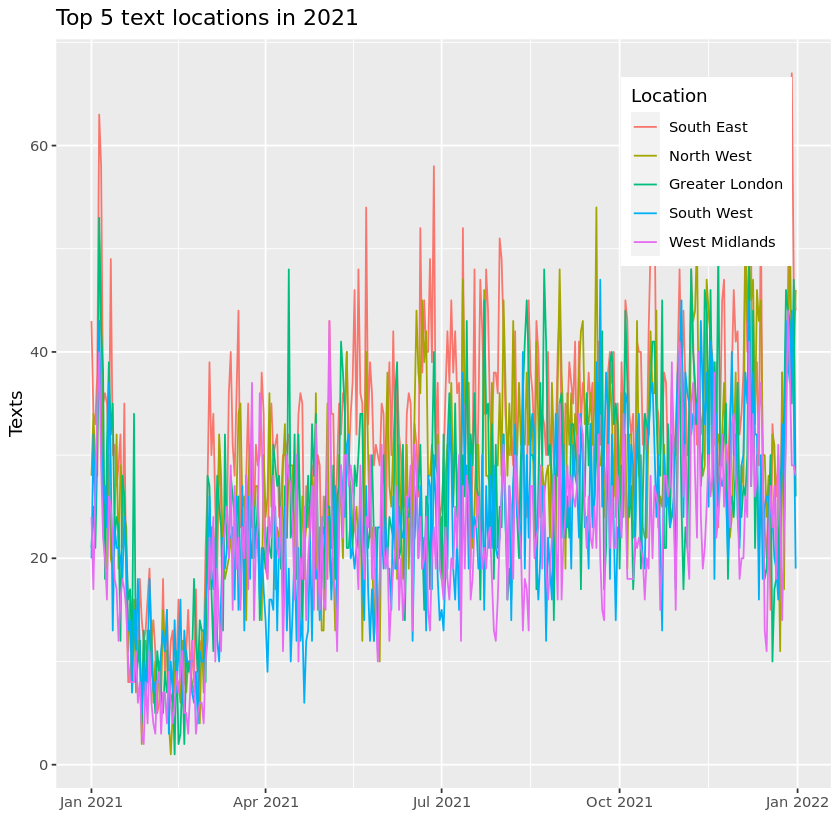

In [24]:
df_top_5_plot_new <- melt(df_top_5_plot, id="day")

ggplot(data=df_top_5_plot_new,
       aes(x=day, y=value, colour=variable)) +
       theme(
       legend.position = c(.95, .95),
       legend.justification = c("right", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6)
       ) + labs(colour = "Location") + xlab("") + ylab("Texts") + ggtitle("Top 5 text locations in 2021") +
       geom_line()
ggsave("../Plots/Top_5_locations.pdf", height = 10, width = 10)

In [25]:
df_top_5_hourly <- df %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
df_top_5_hourly <- df_top_5_hourly[order(df_top_5_hourly$starttime_daylight),]
df_top_5_hourly <- cut(df_top_5_hourly, 'hour')
df_top_5_hourly <- table(df_top_5_hourly)
df_top_5_hourly <- as.data.frame(df_top_5_hourly)
df_top_5_hourly <- as.data.frame(df_top_5_hourly[,1])
colnames(df_top_5_hourly) <- "hour"
head(df_top_5_hourly)

,hour
,<fct>
1,2018-10-25 15:00:00
2,2018-10-25 16:00:00
3,2018-10-25 17:00:00
4,2018-10-25 18:00:00
5,2018-10-25 19:00:00
6,2018-10-25 20:00:00


In [26]:
for (region in top_regions){
    df_temp <- df[df["location"]==region,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'hour')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    colnames(df_plot_temp) <- c("hour", region)
    df_top_5_hourly <- merge(x=df_top_5_hourly, y=df_plot_temp, by="hour")
}
head(df_top_5_hourly)

,hour,South East,North West,Greater London,South West,West Midlands
,<fct>,<int>,<int>,<int>,<int>,<int>
1,2018-11-15 22:00:00,1,0,1,0,0
2,2018-11-15 23:00:00,0,0,0,0,0
3,2018-11-16 00:00:00,0,0,0,0,0
4,2018-11-16 01:00:00,0,0,0,0,0
5,2018-11-16 02:00:00,0,0,0,0,0
6,2018-11-16 03:00:00,0,0,0,0,0


In [27]:
df_top_5_hourly <- df_top_5_hourly %>% mutate(hour = as.POSIXct(hour, format="%Y-%m-%d %H:%M:%S",tz="GMT"))
df_top_5_hourly_plot <- df_top_5_hourly %>% filter(hour >= "2021-11-01 00:00:00" & hour < "2021-12-01 00:00:00")

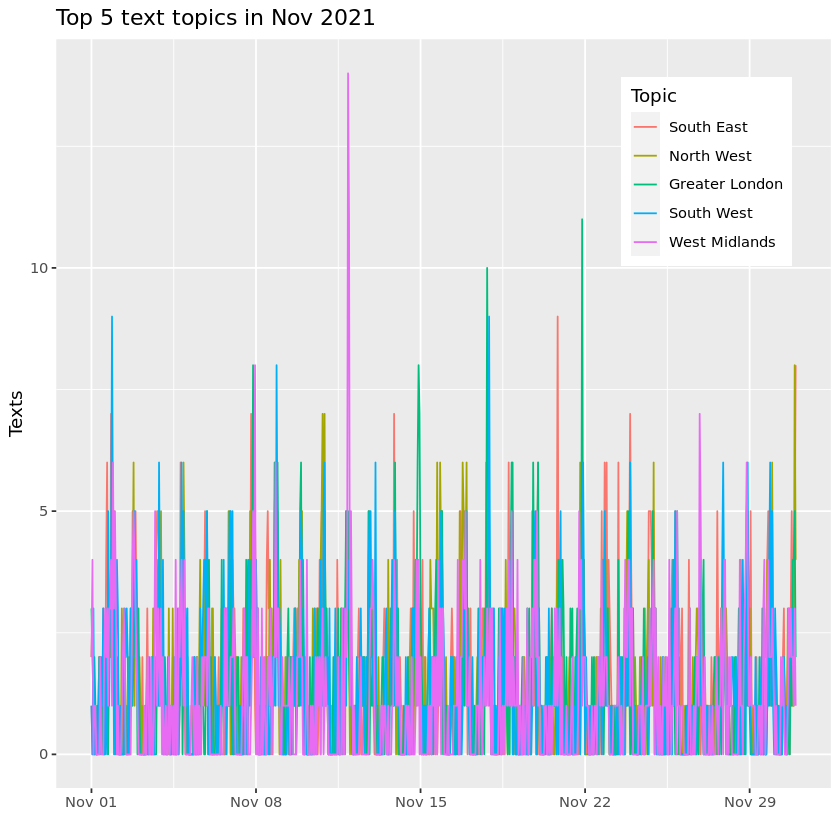

In [26]:
df_top_5_plot_hourly_new <- melt(df_top_5_hourly_plot, id="hour")

ggplot(data=df_top_5_plot_hourly_new,
       aes(x=hour, y=value, colour=variable)) +
       theme(
       legend.position = c(.95, .95),
       legend.justification = c("right", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6)
       ) + labs(colour = "Topic") + xlab("") + ylab("Texts") + ggtitle("Top 5 text topics in Nov 2021") +
       geom_line()
ggsave("../Plots/Top_5_locations_hourly_Nov21.pdf", height = 10, width = 20)

In [8]:
df <- df %>% mutate(starttime = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT"), time = paste(paste0("Q",quarter(starttime)),year(starttime)))

In [9]:
head(df)

,X,starttime_daylight,conversation_id,issues,referred_by,media_referral,age,location,starttime,time
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>
1,298323,2018-10-25 15:46:42+00:00,11247,Self Harm,,,,,2018-10-25 15:46:42,Q4 2018
7,9375,2018-10-25 15:54:58+00:00,11248,Anxiety/Stress|Depressed|Isolated,,,,,2018-10-25 15:54:58,Q4 2018
11,25172,2018-10-25 15:58:10+00:00,11249,"Abuse, sexual",,,,,2018-10-25 15:58:10,Q4 2018
15,104369,2018-10-25 16:12:30+00:00,11250,Anxiety/Stress|Relationship,,,,,2018-10-25 16:12:30,Q4 2018
19,65827,2018-10-25 16:39:02+00:00,11251,"Abuse, emotional|Anxiety/Stress|Isolated|Suicide",,,,,2018-10-25 16:39:02,Q4 2018
25,207283,2018-10-25 16:43:17+00:00,11252,Suicide,,,,,2018-10-25 16:43:17,Q4 2018


In [10]:
df_quarterly <- df %>% filter(starttime_daylight >= "2020-01-01 00:00:00+00:00")

In [11]:
head(df_quarterly)

,X,starttime_daylight,conversation_id,issues,referred_by,media_referral,age,location,starttime,time
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>
1,367126,2020-01-01 00:05:55+00:00,193343,Isolated,,,,,2020-01-01 00:05:55,Q1 2020
2,2200832,2020-01-01 00:08:40+00:00,193344,Anxiety/Stress|Isolated|Other|Suicide,,,,,2020-01-01 00:08:40,Q1 2020
3,1362310,2020-01-01 00:09:33+00:00,193345,Suicide,Media or social media,Facebook - Write In|Instagram - Write In,18-24,Wales,2020-01-01 00:09:33,Q1 2020
4,1984982,2020-01-01 00:10:41+00:00,193346,Suicide,Media or social media,Facebook - Write In,14-17,,2020-01-01 00:10:41,Q1 2020
5,1698401,2020-01-01 00:11:59+00:00,193347,Relationship,Media or social media,Instagram - Write In,14-17,,2020-01-01 00:11:59,Q1 2020
6,1735385,2020-01-01 00:12:32+00:00,193348,Suicide,From a family member or friend,,18-24,,2020-01-01 00:12:32,Q1 2020


In [12]:
time_location_demo <- as.data.frame(table(df_quarterly$time, df_quarterly$location))
time_location_demo <- time_location_demo[!(time_location_demo$Var2==""),]
head(time_location_demo)

,Var1,Var2,Freq
,<fct>,<fct>,<int>
11,Q1 2020,East Midlands,113
12,Q1 2021,East Midlands,1257
13,Q1 2022,East Midlands,2946
14,Q2 2020,East Midlands,117
15,Q2 2021,East Midlands,1879
16,Q2 2022,East Midlands,1778


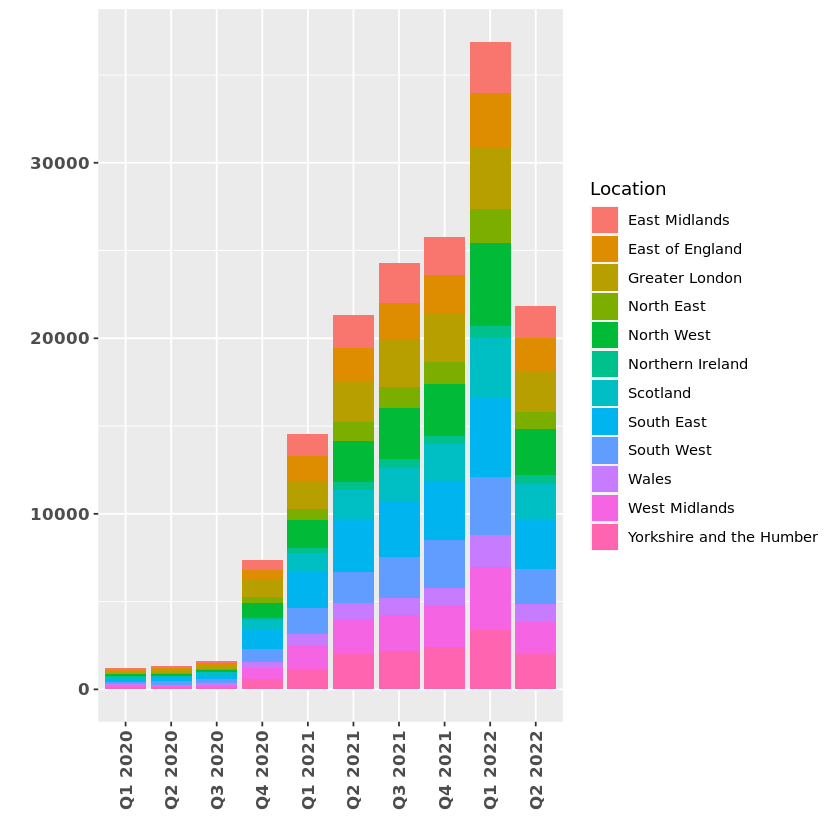

In [13]:
ggplot(time_location_demo, aes(x=factor(Var1, levels=unique(df_quarterly$time)), y=Freq,fill = Var2)) +
        geom_bar(stat = "identity") +
         labs(x="",y="", fill = "Location") + 
            theme(axis.text.x = element_text(face="bold", size = 10,angle=90,vjust=0.5,hjust=1),
                                        axis.text.y = element_text(face="bold", size = 10))


In [14]:
time_location_demo$Var1 <- as.numeric(as.yearqtr(time_location_demo$Var1, "Q%q %Y"))
head(time_location_demo)

,Var1,Var2,Freq
,<dbl>,<fct>,<int>
11,2020.00,East Midlands,113
12,2021.00,East Midlands,1257
13,2022.00,East Midlands,2946
14,2020.25,East Midlands,117
15,2021.25,East Midlands,1879
16,2022.25,East Midlands,1778


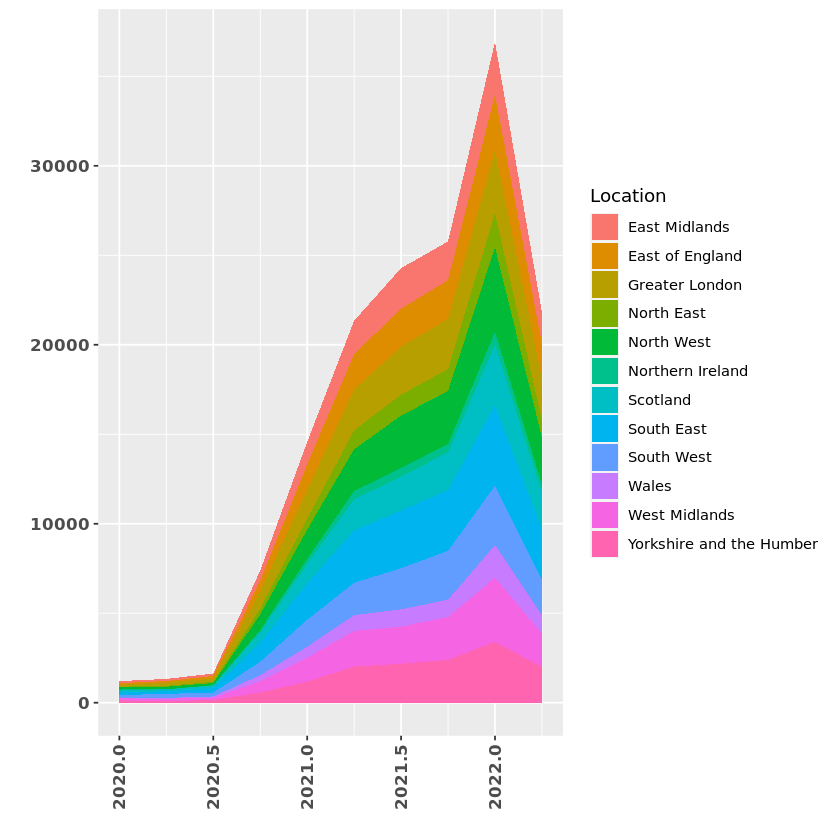

In [15]:
ggplot(time_location_demo, aes(x=Var1, y=Freq,fill = Var2)) +
        geom_area(stat = "identity") +
         labs(x="",y="", fill = "Location") + 
            theme(axis.text.x = element_text(face="bold", size = 10,angle=90,vjust=0.5,hjust=1),
                                        axis.text.y = element_text(face="bold", size = 10))


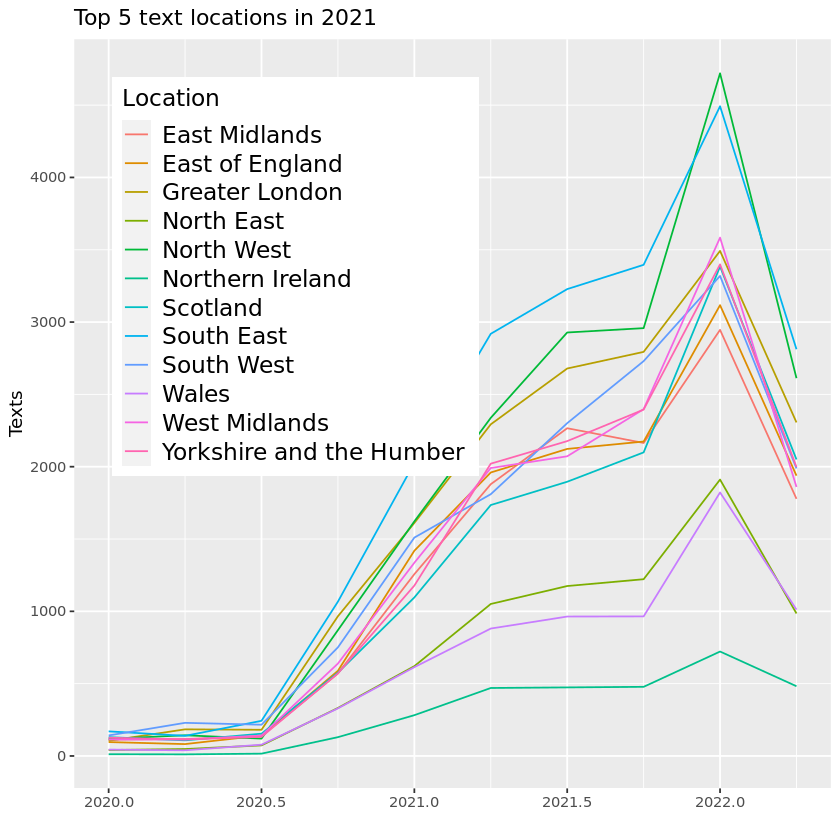

In [29]:
ggplot(data=time_location_demo,
       aes(x=Var1, y=Freq, colour=Var2)) +
       theme(
       legend.position = c(.05, .95),
       legend.justification = c("left", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6),
           legend.title = element_text(size = 14),
           legend.text = element_text(size = 14)
       ) + labs(colour = "Location") + xlab("") + ylab("Texts") + ggtitle("Top 5 text locations in 2021") +
       geom_line()
ggsave("../Plots/Locations_over_time_quarterly.pdf", height = 10, width = 10)